In [3]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("D:\Rohan\ML\Datasets\Air Passengers\AirPassengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.shape

(144, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


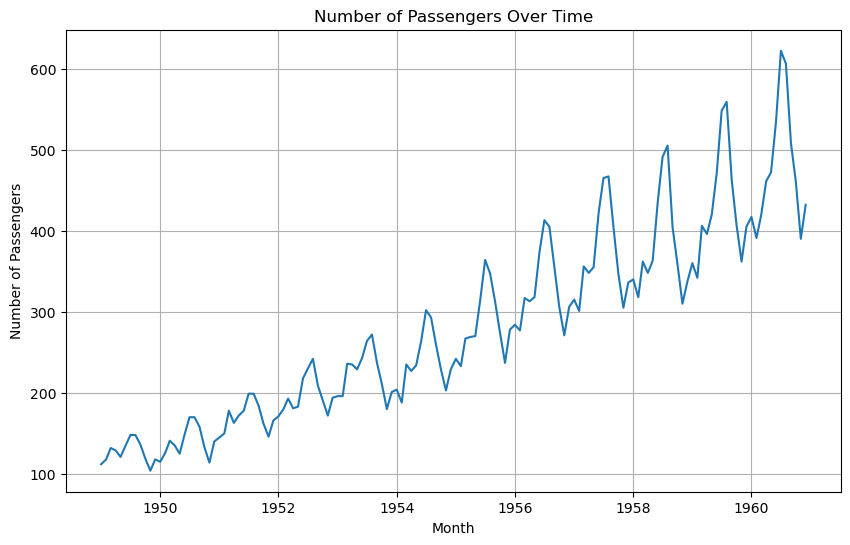

In [9]:
import matplotlib.pyplot as plt

df['Month'] = pd.to_datetime(df['Month'])

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Passengers'])
plt.title('Number of Passengers Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

In [131]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.layers import Input
from tensorflow.keras.regularizers import l2,l1



time_series = np.array(df['Passengers'])

scaler = MinMaxScaler(feature_range=(0, 1)) #Normalization
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1))
#The -1 means that the dimension is inferred automatically.
#Here, it means that the array will have as many rows as needed and exactly one column.

#shape of time_series_scaled will be (550,1)

#create_sequences creates sequences of 50 length each starting from index 0 and the target value is at index 51.
#These sequences are created, converted into numpy arrays and returned
def create_sequences(data, seq_length):
    xs = [] #list to store input sequences [[45,27,36], [91,12,21], .....]
    ys = [] #list to store target values   [87,14,39,......]
    for i in range(len(data)-seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 35
X, y = create_sequences(time_series_scaled, SEQ_LENGTH)

#X.shape[0] is 493 and that is because 7 outliers were removed from 550 (543) and len(data)-seq_length = 493.
#There are 493 different sequences of 50 length each. Note: we can't create sequences whose website visits are randomly picked
#X.shape[1] is 50 because each sequence has length 50
X = X.reshape((X.shape[0], X.shape[1], 1)) #these 3 are dimensions
#1 indicates that 1 timestep has 1 feature value (website visits). If it had 2 feature values, then the 1 would have been 2
#X is a 3D array



#In the below model, 493 different sequences of 50 length each are inputted for training
model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.3),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])



model.compile(optimizer='rmsprop', loss='mean_squared_error')
history = model.fit(X, y, epochs=1400, batch_size=32, verbose=1)

Epoch 1/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1775
Epoch 2/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0326
Epoch 3/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0223
Epoch 4/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0208
Epoch 5/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0269
Epoch 6/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0146
Epoch 7/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0275
Epoch 8/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0224
Epoch 9/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0206
Epoch 10/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0187
Epoch 11/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0144
Epoch 12/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0223
Epoch 13/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0233
Epoch 14/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0204
Epoch 15/1400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0138
Epoc

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
RMSE: 17.310894796273512
MAE: 13.664865336286912
MAPE: 4.44575411972222


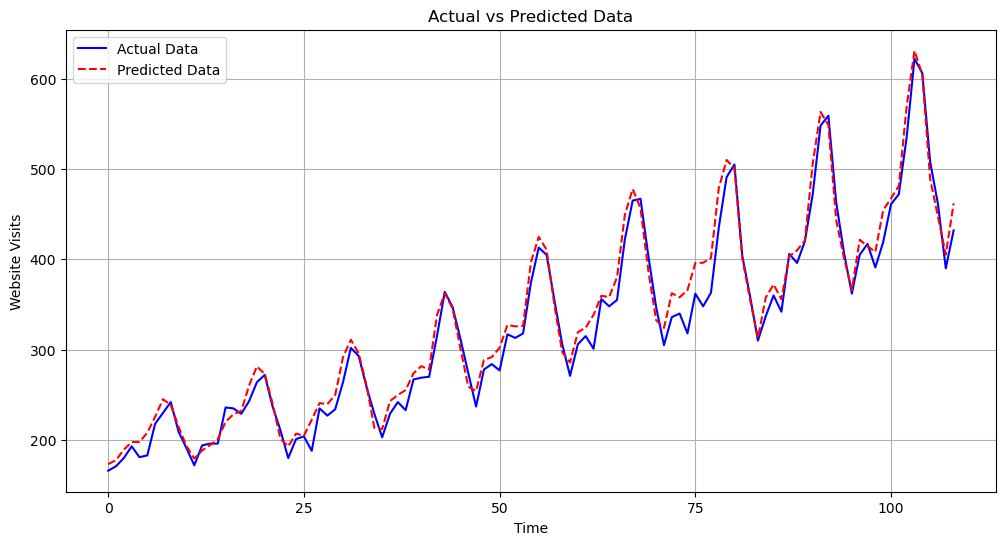

In [132]:
y_pred = model.predict(X)#predictions on every sequence in X

y_pred = scaler.inverse_transform(y_pred)
y_true = scaler.inverse_transform(y.reshape(-1, 1)) #actual y values

from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Data', color='blue')
plt.plot(y_pred, label='Predicted Data', color='red', linestyle='--')
plt.title('Actual vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Website Visits')
plt.xticks(ticks=range(0, len(y_true), 25))
plt.grid(True)
plt.legend()
plt.show()

# in the below graph, first 50 values as well as predictions of time series is not included

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

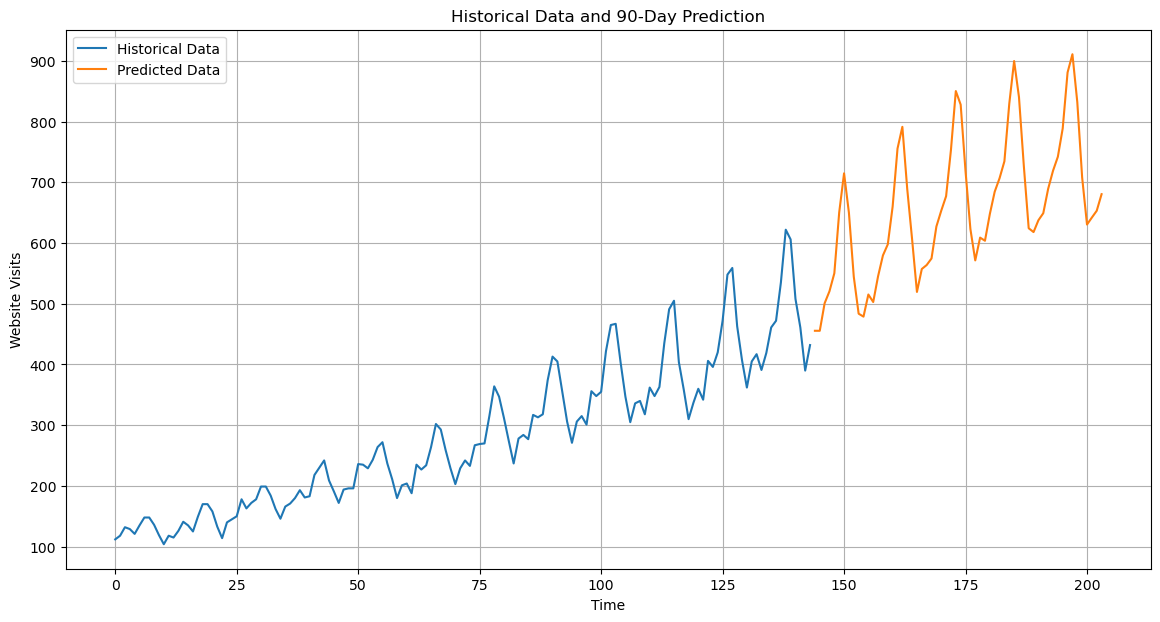

In [134]:
n_predictions = 60
last_sequence = time_series_scaled[-SEQ_LENGTH:]

predictions = []
temp_sequence = last_sequence.copy().reshape(1, -1, 1)
for _ in range(n_predictions):
    pred = model.predict(temp_sequence)
    predictions.append(pred[0][0])
    temp_sequence = np.append(temp_sequence[:, 1:, :], pred.reshape(1, 1, 1), axis=1)
    # so the next set of 50 values is taken into consideration which includes the old 49 values + the previous prediction

predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(14, 7))
plt.plot(range(len(time_series)), time_series, label='Historical Data')
plt.plot(range(len(time_series), len(time_series) + n_predictions), predictions, label='Predicted Data')
plt.xlabel('Time')
plt.ylabel('Website Visits')
plt.title('Historical Data and 90-Day Prediction')
plt.xticks(ticks=range(0, len(time_series) + n_predictions, 25))
plt.grid(True)
plt.legend()
plt.show()

#543 values in stationary_time_series + 90 predictions are shown below

In [ ]:
"""
    LSTM(64, return_sequences=True, activation='tanh'),  # Added LSTM layer with return_sequences=True
    Dropout(0.3),
    LSTM(32, return_sequences=False, activation='tanh'),  # Existing LSTM layer with reduced units
    Dropout(0.3),
    """

In [ ]:
"""
SEQ_LENGTH = 35

model = Sequential([
    Input(shape=(SEQ_LENGTH, 1)),
    LSTM(128, return_sequences=True, activation='tanh'),
    Dropout(0.3),
    LSTM(64, return_sequences=False, activation='tanh'),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dense(1, activation='linear')
])



#This model is great
"""
